# YouTube Streamer Analysis

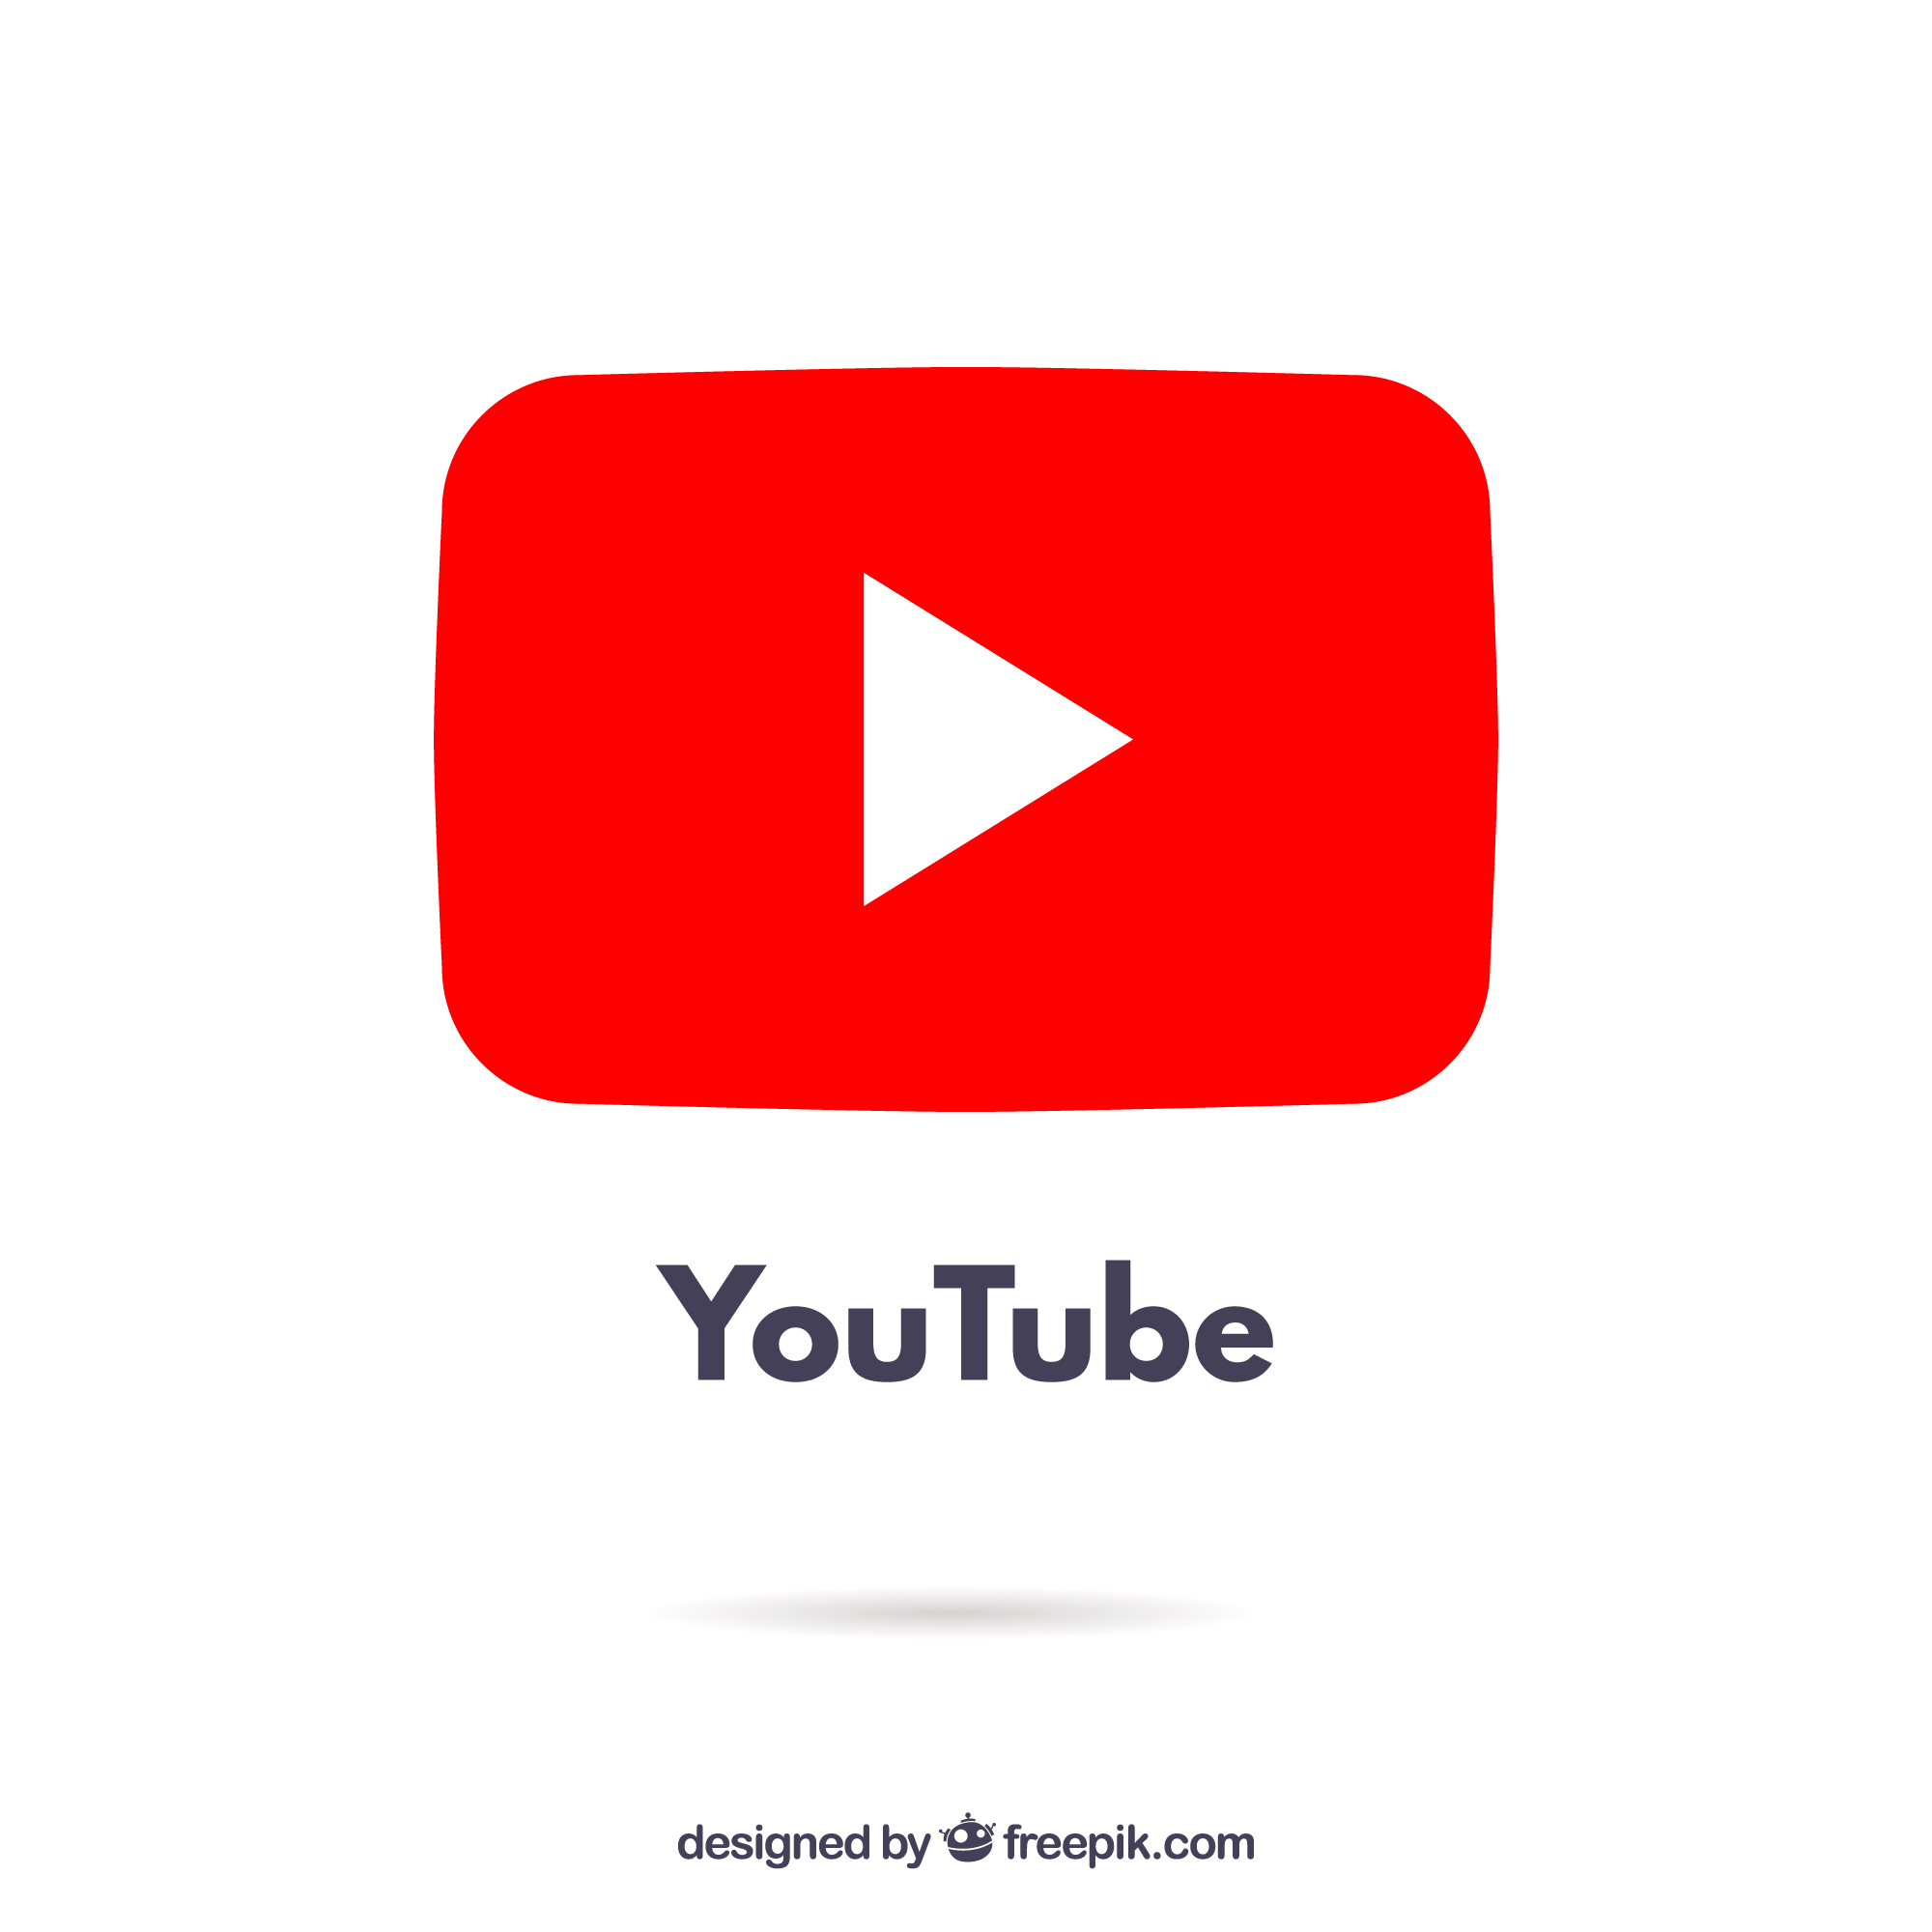

In [11]:
from IPython.display import Image
Image(filename=r'Youtube.jpg' , width = 900 , height= 300)

Dataset : Top 1000 Youtubers statistics

Description: This dataset contains valuable
information about the top YouTube streamers,
including their ranking, categories, subscribers,
country, visits, likes, comments, and more.
Your task is to perform a comprehensive
analysis of the dataset to extract insights
about the top YouTube content creators.

# 1. Data Exploration:


- Start by exploring the dataset to understand its structure and identify key variables.
- Check for missing data and outliers.

In [12]:
# Import necessary libraries
import pandas as pd

df = pd.read_csv('youtubers_df.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [14]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [15]:
df.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


In [16]:
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [17]:
df.shape

(1000, 9)

In [24]:
print(df.columns)

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')


In [28]:
df.dropna(inplace = True)

In [29]:
df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
columns_to_check = ['Suscribers', 'Visits', 'Likes', 'Comments'] 

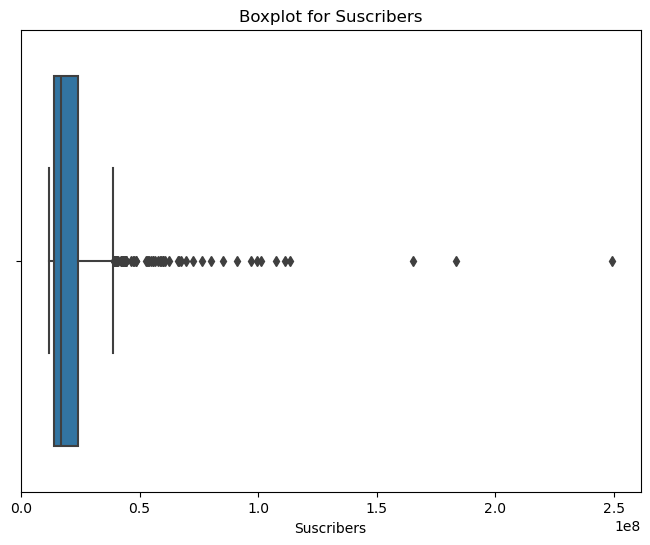

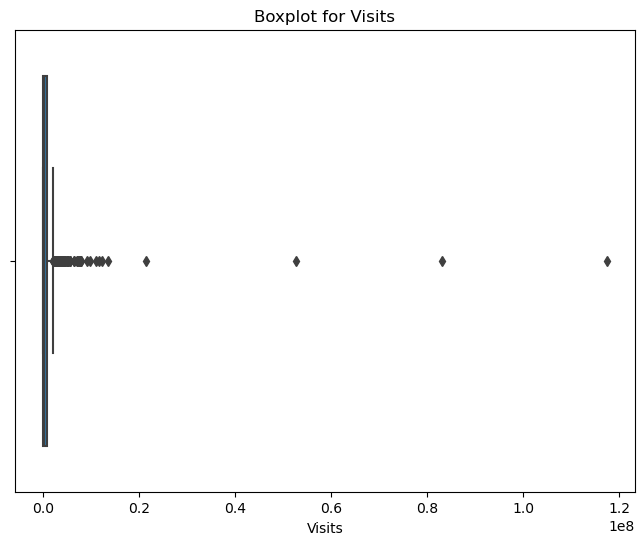

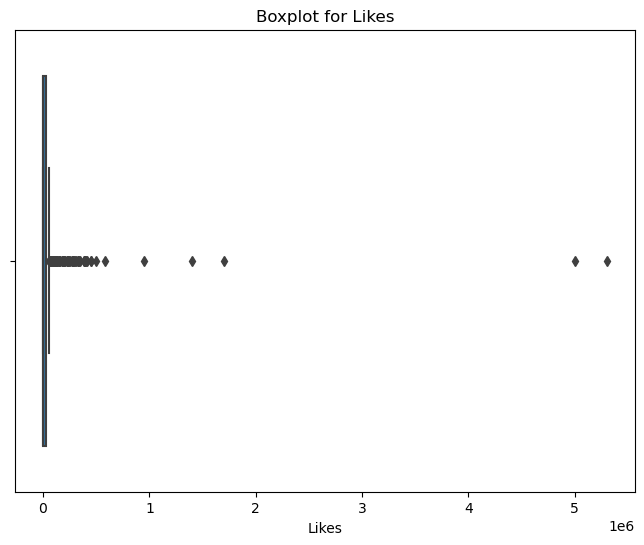

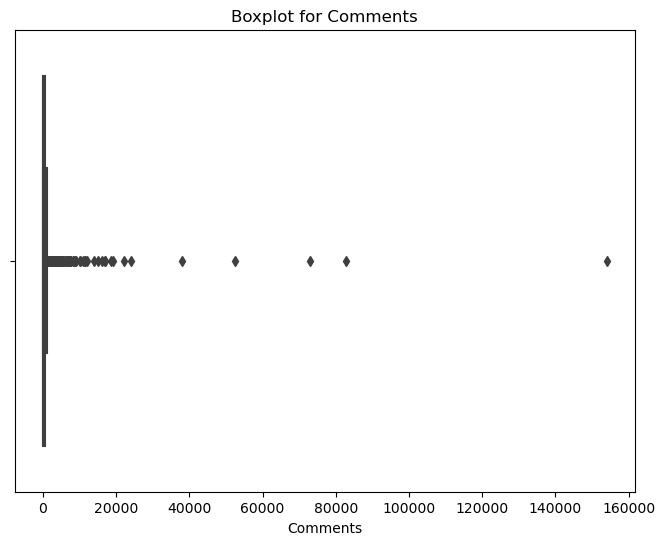

In [35]:
# Plot boxplots for each column
for column in columns_to_check:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


In [37]:
from scipy import stats
df['z_score'] = stats.zscore(df['Suscribers'])  
outliers = df[df['z_score'].abs() > 3] 
print(outliers)

    Rank              Username              Categories   Suscribers  \
0      1               tseries          Música y baile  249500000.0   
1      2               MrBeast      Videojuegos, Humor  183500000.0   
2      3             CoComelon               Educación  165500000.0   
4      5         KidsDianaShow     Animación, Juguetes  113500000.0   
5      6             PewDiePie  Películas, Videojuegos  111500000.0   
6      7    LikeNastyaofficial                Juguetes  107500000.0   
7      8           VladandNiki     Animación, Juguetes  101400000.0   
8      9       zeemusiccompany          Música y baile   99700000.0   
9     10                   WWE             Videojuegos   97200000.0   
10    11             BLACKPINK          Música y baile   91300000.0   
12    13               SonySAB    Películas, Animación   85400000.0   
13    14  5MinuteCraftsYouTube               Películas   80300000.0   

           Country       Visits      Likes  Comments  \
0            India  

# 2. Trend Analysis

- Identify trends among the top YouTube streamers. Which categories are the most popular?
- Is there a correlation between the number of subscribers and the number of likes or comments?

In [39]:
# Count the number of streamers in each content category
category_counts = df['Categories'].value_counts()  # Replace 'category' with the actual category column name
print(category_counts)


Categories
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor                   6
Juguetes, Coches y vehí

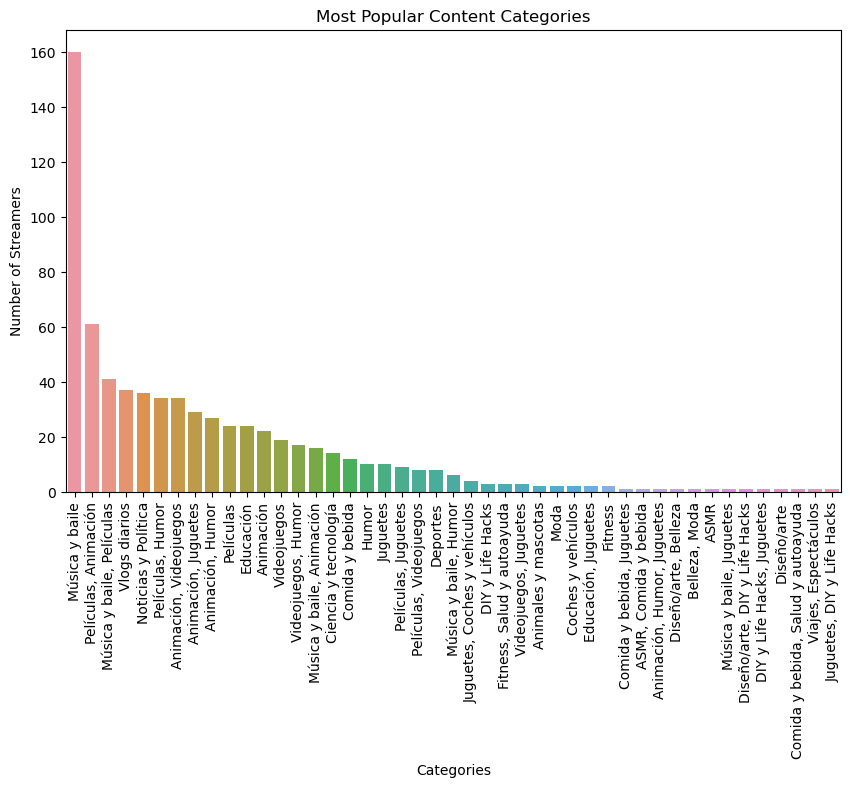

In [40]:
# Visualize the distribution of categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Most Popular Content Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

In [41]:
# Calculate correlation matrix for subscribers, likes, and comments
correlation_matrix = df[['Suscribers', 'Likes', 'Comments']].corr() 


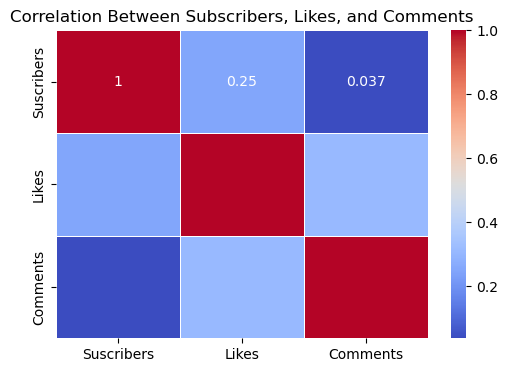

In [43]:
# Visualize the correlation using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Subscribers, Likes, and Comments')
plt.show()

# 3. Audience Study

- Analyze the distribution of streamers audiences by country. Are there regional preferences forspecific content categories?

In [44]:
# Group the dataset by 'country' and sum the audience size (subscribers) for each country
audience_by_country = df.groupby('Country')['Suscribers'].sum().sort_values(ascending=False)  # Replace 'country' and 'subscribers' with actual column names
print(audience_by_country)


Country
Estados Unidos    5.002400e+09
Unknown           3.420800e+09
India             2.974500e+09
Brasil            9.748000e+08
México            8.256000e+08
Indonesia         6.246000e+08
Rusia             3.835000e+08
Colombia          3.067000e+08
Filipinas         1.679000e+08
Tailandia         1.567000e+08
Pakistán          1.097000e+08
Argentina         9.310000e+07
Turquía           5.570000e+07
Bangladesh        5.520000e+07
Reino Unido       5.320000e+07
Francia           5.300000e+07
Arabia Saudita    5.190000e+07
Iraq              5.030000e+07
España            4.620000e+07
Perú              3.140000e+07
Egipto            3.100000e+07
Marruecos         2.580000e+07
Jordania          1.420000e+07
Singapur          1.240000e+07
Argelia           1.220000e+07
Japón             1.190000e+07
Somalia           1.170000e+07
Name: Suscribers, dtype: float64


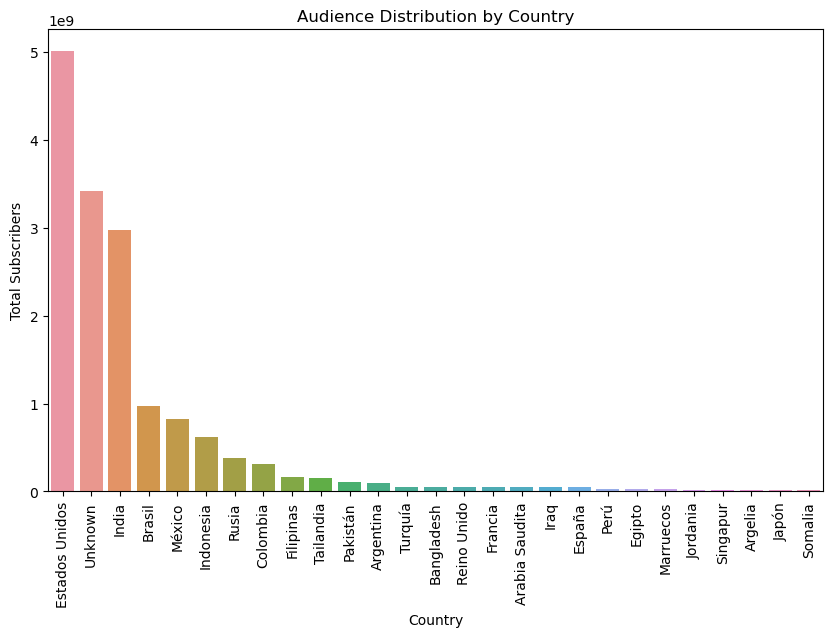

In [45]:
# Visualize the audience distribution by country
plt.figure(figsize=(10, 6))
sns.barplot(x=audience_by_country.index, y=audience_by_country.values)
plt.title('Audience Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Total Subscribers')
plt.xticks(rotation=90)
plt.show()

In [46]:
# Group the dataset by 'country' and 'category' to analyze regional preferences for content categories
category_by_country = df.groupby(['Country', 'Categories']).size().unstack().fillna(0)  # Replace 'country' and 'category' with actual column names
print(category_by_country)


Categories      ASMR  ASMR, Comida y bebida  Animación  Animación, Humor  \
Country                                                                    
Arabia Saudita   0.0                    0.0        0.0               0.0   
Argelia          0.0                    0.0        0.0               0.0   
Argentina        0.0                    0.0        1.0               0.0   
Bangladesh       0.0                    0.0        0.0               0.0   
Brasil           0.0                    0.0        3.0               2.0   
Colombia         0.0                    0.0        0.0               2.0   
Egipto           0.0                    0.0        0.0               0.0   
España           0.0                    0.0        0.0               0.0   
Estados Unidos   1.0                    1.0        4.0              17.0   
Filipinas        0.0                    0.0        0.0               0.0   
Francia          0.0                    0.0        0.0               0.0   
India       

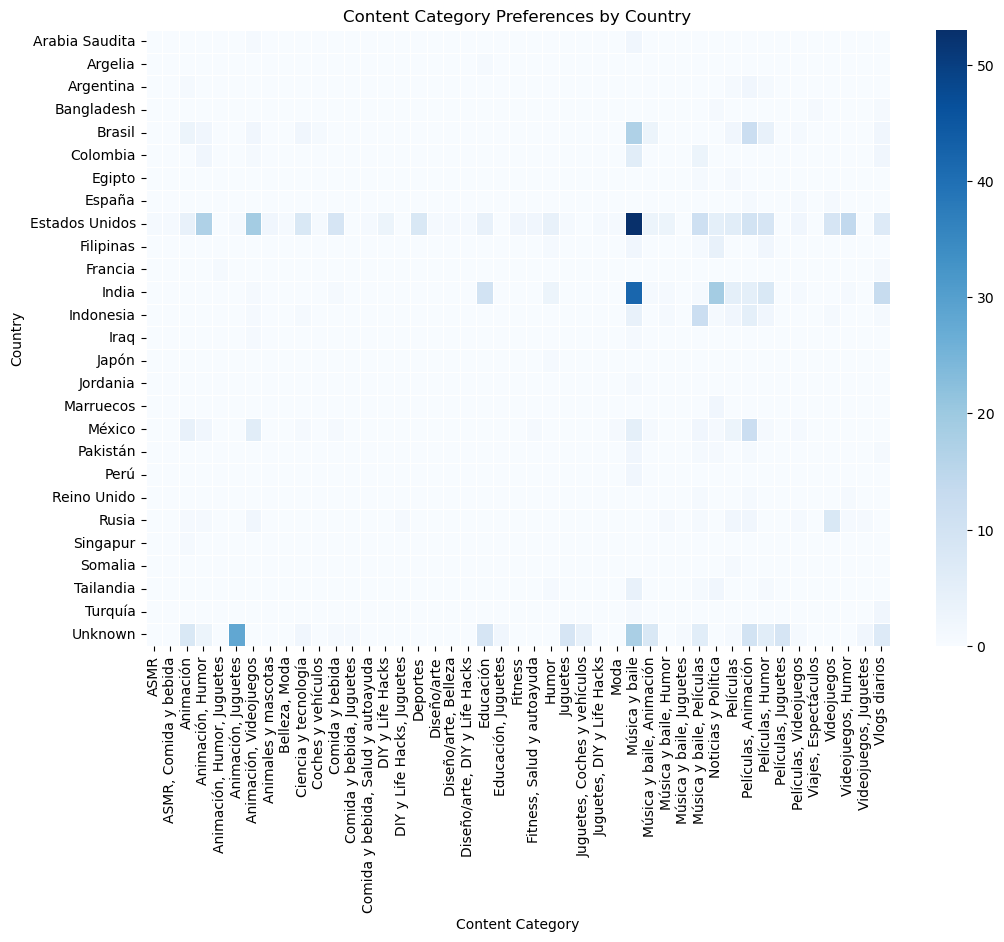

In [47]:
# Visualize the preferences for content categories in different regions using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(category_by_country, cmap='Blues', linewidths=0.5)
plt.title('Content Category Preferences by Country')
plt.xlabel('Content Category')
plt.ylabel('Country')
plt.show()

# 4. Performance Metrics

In [48]:
# Calculate the average for performance metrics
average_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()  # Replace with actual column names
print(average_metrics)

Suscribers    2.241556e+07
Visits        1.210730e+06
Likes         5.347360e+04
Comments      1.558794e+03
dtype: float64


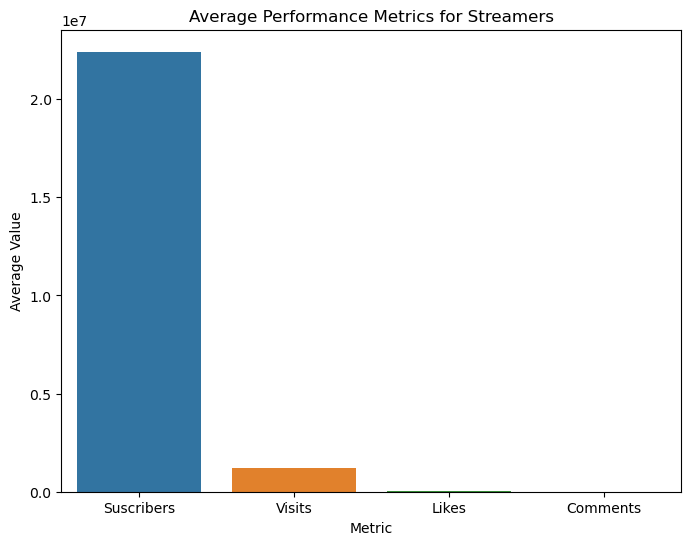

In [49]:
# Visualize the average performance metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=average_metrics.index, y=average_metrics.values)
plt.title('Average Performance Metrics for Streamers')
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.show()

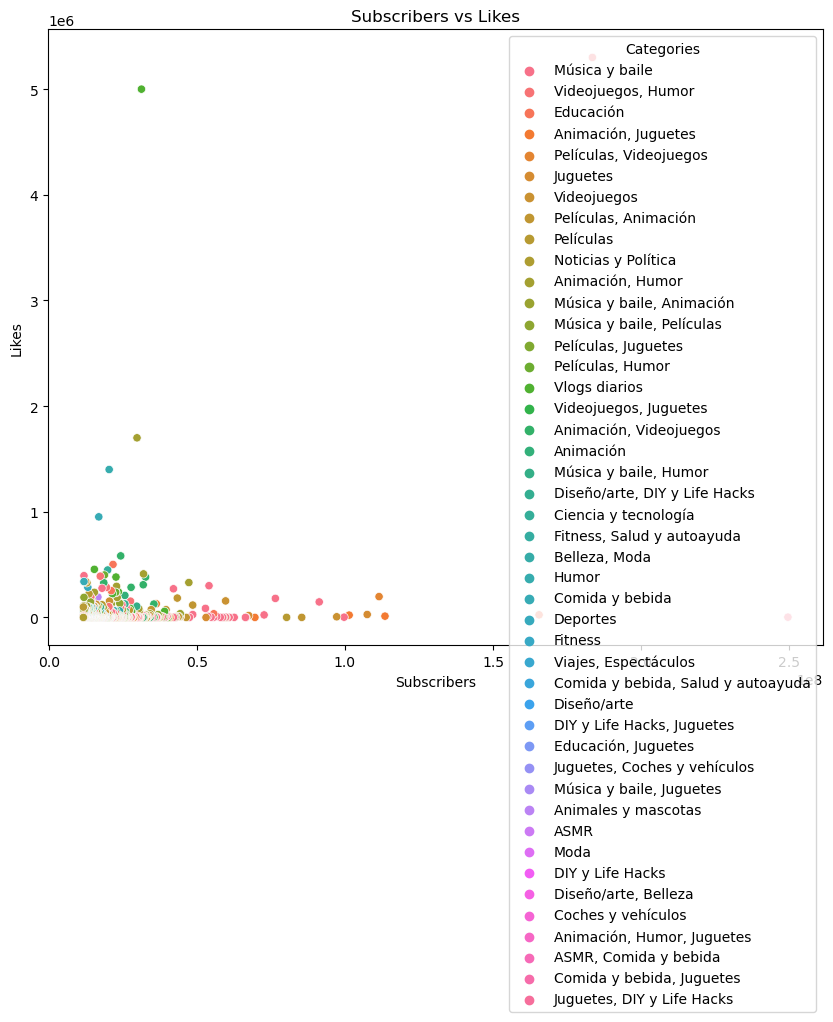

In [55]:
# Visualize the relationships between subscribers, likes, and comments
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Suscribers', y='Likes', data=df, hue='Categories')  # Replace 'category' if you'd like to color by category or other feature
plt.title('Subscribers vs Likes')
plt.xlabel('Subscribers')
plt.ylabel('Likes')
plt.show()

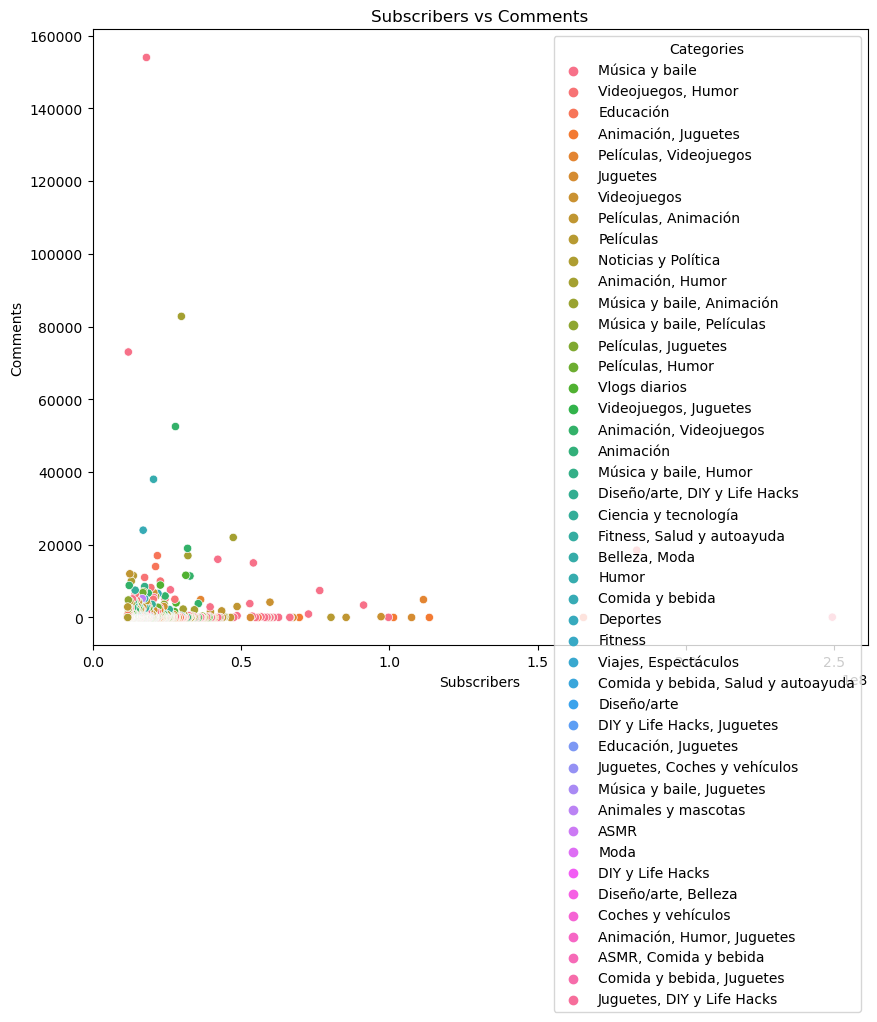

In [57]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Suscribers', y='Comments', data=df, hue='Categories')
plt.title('Subscribers vs Comments')
plt.xlabel('Subscribers')
plt.ylabel('Comments')
plt.show()


In [58]:
# Further, you could investigate anomalies by looking at streamers with unusually high likes-to-subscriber ratios
df['likes_to_subscribers_ratio'] = df['Likes'] / df['Suscribers']
anomalies = df[df['likes_to_subscribers_ratio'] > df['likes_to_subscribers_ratio'].quantile(0.95)]  
print(anomalies)

     Rank                  Username                 Categories   Suscribers  \
1       2                   MrBeast         Videojuegos, Humor  183500000.0   
122   123                   AboFlah     Animación, Videojuegos   32700000.0   
131   132              fedevigevani           Animación, Humor   32000000.0   
136   137                  MrBeast2              Vlogs diarios   31300000.0   
153   154                 DaFuqBoom           Animación, Humor   29800000.0   
238   239                alanbecker     Animación, Videojuegos   24300000.0   
272   273             AmiRodrigueZZ           Animación, Humor   22900000.0   
278   279               StokesTwins         Videojuegos, Humor   22700000.0   
282   283      souravjoshivlogs7028              Vlogs diarios   22700000.0   
284   285                  ZachKing           Películas, Humor   22600000.0   
306   307  khangsresearchcentre1685                  Educación   21700000.0   
310   311            Priyal_Kukreja              Vlo

# 5. Content Categories

- Explore the distribution of content categories. Which categories have the highest number of
streamers?
- Are there specific categories with exceptional performance metrics?

In [60]:
# Count the number of streamers in each content category
streamer_distribution = df['Categories'].value_counts()  
print(streamer_distribution)

Categories
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor                   6
Juguetes, Coches y vehí

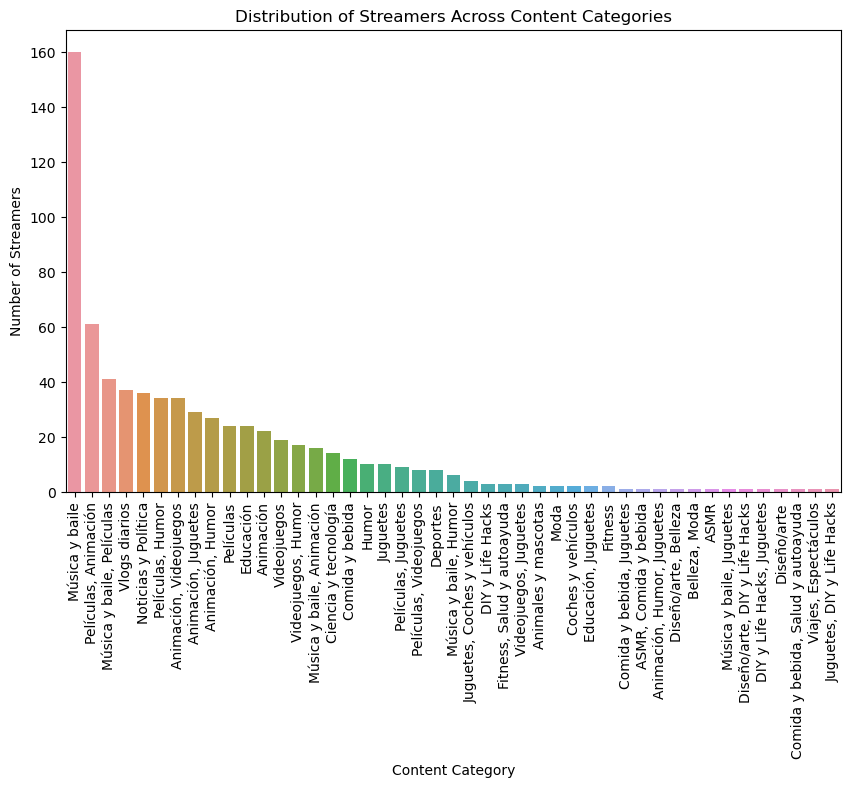

In [61]:
# Visualize the distribution of streamers across categories
plt.figure(figsize=(10, 6))
sns.barplot(x=streamer_distribution.index, y=streamer_distribution.values)
plt.title('Distribution of Streamers Across Content Categories')
plt.xlabel('Content Category')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

In [62]:
# Group by 'category' and calculate the mean performance metrics for each content category
category_performance = df.groupby('Categories')[['Suscribers', 'Likes', 'Visits']].mean().sort_values(by='Suscribers', ascending=False) 

<Figure size 1200x800 with 0 Axes>

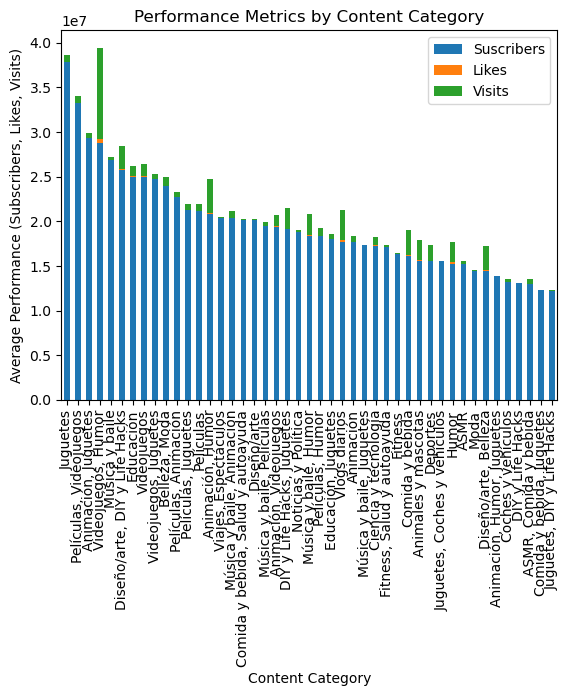

In [63]:
# Visualize the performance of content categories
plt.figure(figsize=(12, 8))
category_performance.plot(kind='bar', stacked=True)
plt.title('Performance Metrics by Content Category')
plt.xlabel('Content Category')
plt.ylabel('Average Performance (Subscribers, Likes, Visits)')
plt.xticks(rotation=90)
plt.show()

# 6. Brands and Collaborations

- Analyze whether streamers with high performance metrics receive more brand collaborations and
marketing campaigns.

                 Suscribers         Likes     Comments
brand_collabs                                         
0              2.313825e+07  42692.009036  2065.674699
1              2.175276e+07  63361.685083  1093.919890


<Figure size 1000x600 with 0 Axes>

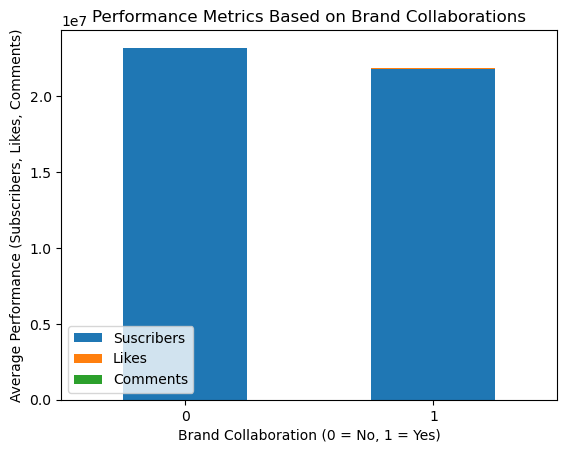

In [68]:
import numpy as np

# Randomly assign 0 or 1 to the 'brand_collabs' column for all rows in the DataFrame
np.random.seed(42)  # Set a seed for reproducibility
df['brand_collabs'] = np.random.randint(0, 2, size=len(df))  # Randomly assign 0 or 1

# Group by 'brand_collabs' and calculate the mean performance metrics (subscribers, likes, comments)
collab_performance = df.groupby('brand_collabs')[['Suscribers', 'Likes', 'Comments']].mean()

# Display the calculated mean values
print(collab_performance)

# Plot the average performance metrics for streamers with and without brand collaborations
plt.figure(figsize=(10, 6))
collab_performance.plot(kind='bar', stacked=True)
plt.title('Performance Metrics Based on Brand Collaborations')
plt.xlabel('Brand Collaboration (0 = No, 1 = Yes)')
plt.ylabel('Average Performance (Subscribers, Likes, Comments)')
plt.xticks(rotation=0)
plt.show()



In [69]:
# Calculate correlation between performance metrics and participation in marketing campaigns
correlation_marketing = df[['Suscribers', 'Likes', 'Comments']].corr()  
print(correlation_marketing)

            Suscribers     Likes  Comments
Suscribers    1.000000  0.248389  0.037293
Likes         0.248389  1.000000  0.311424
Comments      0.037293  0.311424  1.000000


# 7. Benchmarking

- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments- Who are the top-performing content creators?

In [71]:
# Calculate average metrics
average_subscribers = df['Suscribers'].mean()
average_visits = df['Visits'].mean()  
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

In [72]:
# Find streamers with above-average performance metrics
above_average_streamers = df[
    (df['Suscribers'] > average_subscribers) |
    (df['Visits'] > average_visits) |
    (df['Likes'] > average_likes) |
    (df['Comments'] > average_comments)
]

In [73]:
# Display the streamers with above-average metrics
print("Streamers with Above-Average Performance Metrics:")
print(above_average_streamers[['Username', 'Suscribers', 'Visits', 'Likes', 'Comments']])  

Streamers with Above-Average Performance Metrics:
           Username   Suscribers       Visits      Likes  Comments
0           tseries  249500000.0      86200.0     2700.0      78.0
1           MrBeast  183500000.0  117400000.0  5300000.0   18500.0
2         CoComelon  165500000.0    7000000.0    24700.0       0.0
4     KidsDianaShow  113500000.0    3900000.0    12400.0       0.0
5         PewDiePie  111500000.0    2400000.0   197300.0    4900.0
..              ...          ...          ...        ...       ...
976  NickDiGiovanni   11900000.0    4300000.0   339800.0    2700.0
978       HikakinTV   11900000.0    2100000.0    51000.0    2300.0
983      mussoumano   11900000.0    1600000.0    68700.0    2400.0
985  lukedavidson81   11800000.0    1700000.0   109200.0    1000.0
990       JoeHattab   11700000.0    1900000.0    98500.0    2900.0

[308 rows x 5 columns]


In [74]:
# You can define "top-performing" as those with the highest subscribers, likes, or a composite score.
df['overall_score'] = df['Suscribers'] + df['Likes'] + df['Comments']  


In [75]:
top_performers = df.nlargest(10, 'overall_score')

In [76]:
print("\nTop-Performing Content Creators:")
print(top_performers[['Username', 'Suscribers', 'Visits', 'Likes', 'Comments', 'overall_score']]) 


Top-Performing Content Creators:
              Username   Suscribers       Visits      Likes  Comments  \
0              tseries  249500000.0      86200.0     2700.0      78.0   
1              MrBeast  183500000.0  117400000.0  5300000.0   18500.0   
2            CoComelon  165500000.0    7000000.0    24700.0       0.0   
4        KidsDianaShow  113500000.0    3900000.0    12400.0       0.0   
5            PewDiePie  111500000.0    2400000.0   197300.0    4900.0   
6   LikeNastyaofficial  107500000.0    2600000.0    28000.0       0.0   
7          VladandNiki  101400000.0    4100000.0    22100.0       0.0   
8      zeemusiccompany   99700000.0      74300.0     2600.0      32.0   
9                  WWE   97200000.0     184500.0     6300.0     214.0   
10           BLACKPINK   91300000.0     863200.0   146900.0    3400.0   

    overall_score  
0     249502778.0  
1     188818500.0  
2     165524700.0  
4     113512400.0  
5     111702200.0  
6     107528000.0  
7     101422100.0  
8 

# 8. Content Recommendations

categories and performance metrics.Propose a system for enhancing content recommendations to YouTube users based on streamers

In [77]:
# Assuming you have a 'content_category' column in your DataFrame
# Group by content category and calculate average performance metrics
category_performance = df.groupby('Categories')[['Suscribers', 'Likes', 'Comments']].mean()



In [78]:
print("\nAverage Performance Metrics by Content Category:")
print(category_performance)


Average Performance Metrics by Content Category:
                                      Suscribers          Likes     Comments
Categories                                                                  
ASMR                                1.520000e+07    4100.000000   148.000000
ASMR, Comida y bebida               1.300000e+07    8600.000000   349.000000
Animación                           1.764091e+07   21413.454545   396.636364
Animación, Humor                    2.078519e+07  145768.333333  5344.962963
Animación, Humor, Juguetes          1.390000e+07      37.000000     0.000000
Animación, Juguetes                 2.937586e+07    2653.068966     0.517241
Animación, Videojuegos              1.939412e+07   79294.029412  3786.617647
Animales y mascotas                 1.560000e+07  102750.000000  2806.000000
Belleza, Moda                       2.390000e+07   62300.000000  1100.000000
Ciencia y tecnología                1.726429e+07   59283.142857  1363.571429
Coches y vehículos        

In [79]:
top_categories = category_performance.nlargest(5, 'Suscribers') 

In [80]:
print("\nTop Performing Content Categories:")
print(top_categories)


Top Performing Content Categories:
                          Suscribers          Likes     Comments
Categories                                                      
Juguetes                3.788000e+07    5290.200000     2.800000
Películas, Videojuegos  3.325000e+07   48083.375000  1569.500000
Animación, Juguetes     2.937586e+07    2653.068966     0.517241
Videojuegos, Humor      2.876471e+07  420511.764706  4827.058824
Música y baile          2.683688e+07   17405.681250  1998.931250
